In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
#Import the dataset
df = pd.read_csv('HR_capstone_dataset.csv')

Variable Description of the dataset:

satisfaction_level-Employee-reported job satisfaction level [0–1]

last_evaluation-Score of employee's last performance review [0–1]

number_project-Number of projects employee contributes to

average_monthly_hours-Average number of hours employee worked per month

time_spend_company-How long the employee has been with the company (years)

Work_accident-Whether or not the employee experienced an accident while at work

left-Whether or not the employee left the company

promotion_last_5years-Whether or not the employee was promoted in the last 5 years

Department-The employee's department

salary-The employee's salary (U.S. dollars)

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#List of Columns of the dataset
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [5]:
#Total number of Null values in each column
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Data Preprocessing

In [6]:
#One-hot encoding for department column
df = pd.get_dummies(df, columns = ['Department'], drop_first = True)

In [7]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,low,False,False,False,False,False,False,False,True,False


In [8]:
#Ordinal Encoding for salary column
labels = {'low':1, 'medium':2, 'high':3}
df['salary'] = df['salary'].map(labels)

In [9]:
df['salary'].value_counts()

salary
1    7316
2    6446
3    1237
Name: count, dtype: int64

In [10]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,1,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,1,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,1,False,False,False,False,False,False,False,True,False


In [14]:
#MinMaxScaler makes sure the column values in between 0 and 1 
scaled_columns = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']
scaled = MinMaxScaler()
df[scaled_columns] = scaled.fit_transform(df[scaled_columns])

In [15]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,1,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0,1,0,1,False,False,False,False,False,False,False,True,False
14995,0.307692,0.187500,0.0,0.299065,0.125,0,1,0,1,False,False,False,False,False,False,False,True,False
14996,0.307692,0.265625,0.0,0.219626,0.125,0,1,0,1,False,False,False,False,False,False,False,True,False
14997,0.021978,0.937500,0.8,0.859813,0.250,0,1,0,1,False,False,False,False,False,False,False,True,False


# Exploratory Data Analysis

In [16]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279,0.144610,0.238083,0.021268,1.594706
std,0.273220,0.267452,0.246518,0.233379,0.182517,0.351719,0.425924,0.144281,0.637183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000,1.000000
50%,0.604396,0.562500,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000,2.000000
75%,0.802198,0.796875,0.600000,0.696262,0.250000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

# Histograms for numerical analysis

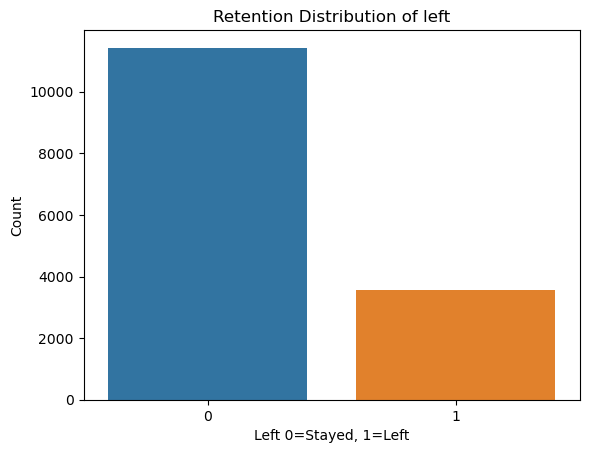

In [18]:
sns.countplot(x = 'left', data = df)
plt.title('Retention Distribution of left')
plt.xlabel('Left 0=Stayed, 1=Left')
plt.ylabel('Count')
plt.show()

# Retention by Categorical Variables

In [19]:
dept_columns = [col for col in df.columns if 'Department_' in col]
dept_columns

['Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical']

In [20]:
#Creating department column for knowing the relation with the left column
df['Department'] = df[dept_columns].idxmax(axis=1).str.replace('Department_','')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Department
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,1,False,False,False,False,False,False,True,False,False,sales
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,2,False,False,False,False,False,False,True,False,False,sales
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,2,False,False,False,False,False,False,True,False,False,sales
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,1,False,False,False,False,False,False,True,False,False,sales
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,1,False,False,False,False,False,False,True,False,False,sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0,1,0,1,False,False,False,False,False,False,False,True,False,support
14995,0.307692,0.187500,0.0,0.299065,0.125,0,1,0,1,False,False,False,False,False,False,False,True,False,support
14996,0.307692,0.265625,0.0,0.219626,0.125,0,1,0,1,False,False,False,False,False,False,False,True,False,support
14997,0.021978,0.937500,0.8,0.859813,0.250,0,1,0,1,False,False,False,False,False,False,False,True,False,support


Text(0, 0.5, 'Proportion of employees who left')

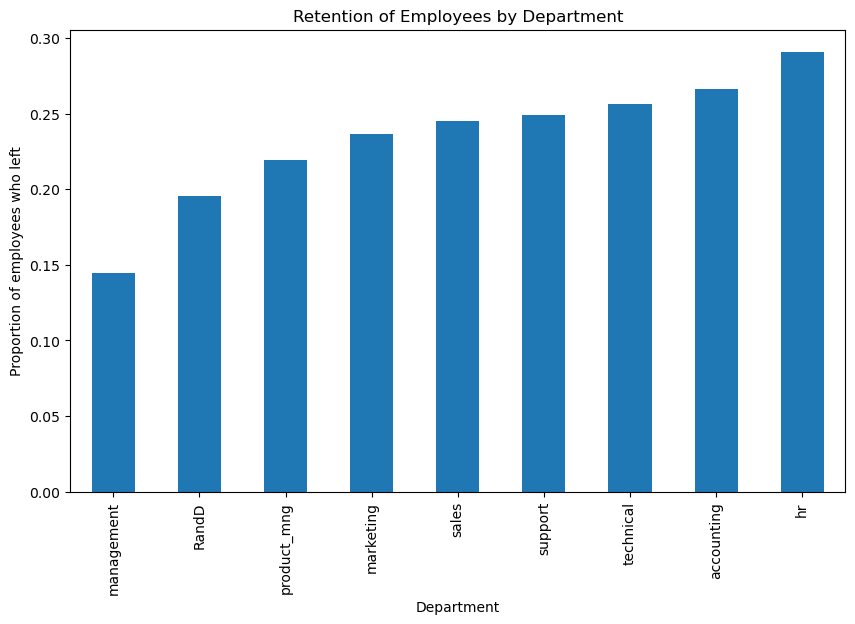

In [21]:
#Groupby retention-Department
#This gives the proportion of employees who left the company from each department
dept_reten = df.groupby('Department')['left'].mean().sort_values()

dept_reten.plot(kind='bar', figsize=(10,6))
plt.title('Retention of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of employees who left')#Groupby Retention Salary
dept_sal = df.groupby('salary')['left'].mean().sort_values()

salary_mapping = {1:'Low', 2:'medium', 3:'High'}
dept_sal.index = dept_sal.index.map(salary_mapping)

dept_sal.plot(kind='bar', figsize=(10,6))
plt.title('Retention of employees by salary')
plt.xlabel('Salary')
plt.ylabel('Proportion of employees who left')

Text(0, 0.5, 'Proportion of employees who left')

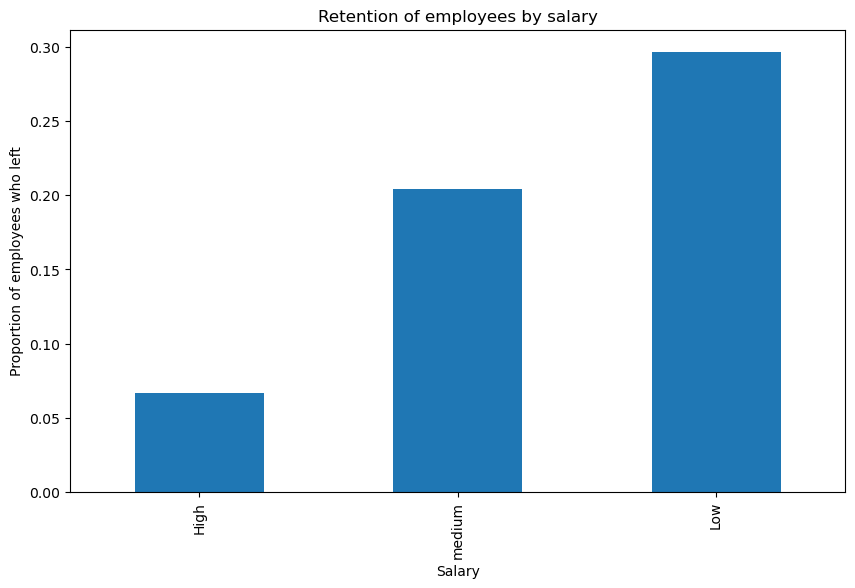

In [22]:
#Groupby Retention Salary
dept_sal = df.groupby('salary')['left'].mean().sort_values()

salary_mapping = {1:'Low', 2:'medium', 3:'High'}
dept_sal.index = dept_sal.index.map(salary_mapping)

dept_sal.plot(kind='bar', figsize=(10,6))
plt.title('Retention of employees by salary')
plt.xlabel('Salary')
plt.ylabel('Proportion of employees who left')

Text(0.5, 1.0, 'Satisfaction level of employees who left the company')

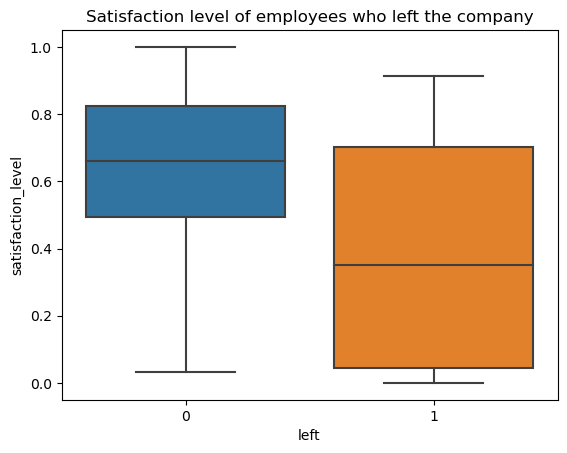

In [23]:
#left vs satisfaction_level
sns.boxplot(x="left",y="satisfaction_level",data=df)
plt.title('Satisfaction level of employees who left the company')
#plt.show

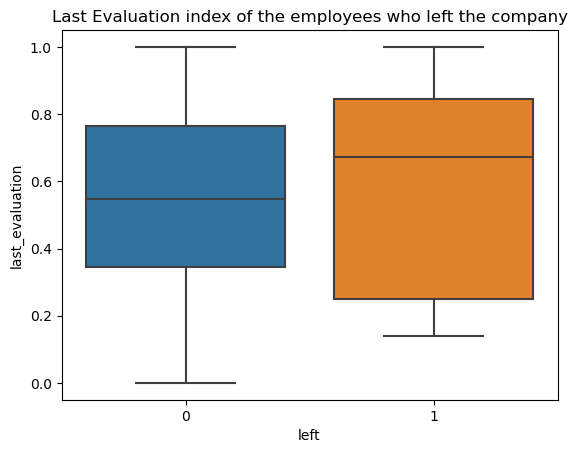

In [24]:
#left vs last_evaluation
sns.boxplot(x='left',y='last_evaluation',data=df)
plt.title('Last Evaluation index of the employees who left the company')
plt.show()

# Correlation Analysis

In [25]:
#Select only numerical columns
numerical_df = df.select_dtypes(include=['float64','int64'])

#Compute correlation matrix
correlation_matrix = numerical_df.corr()
correlation_matrix_left = correlation_matrix['left'].sort_values(ascending = False)
correlation_matrix_left

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
salary                  -0.157898
satisfaction_level      -0.388375
Name: left, dtype: float64

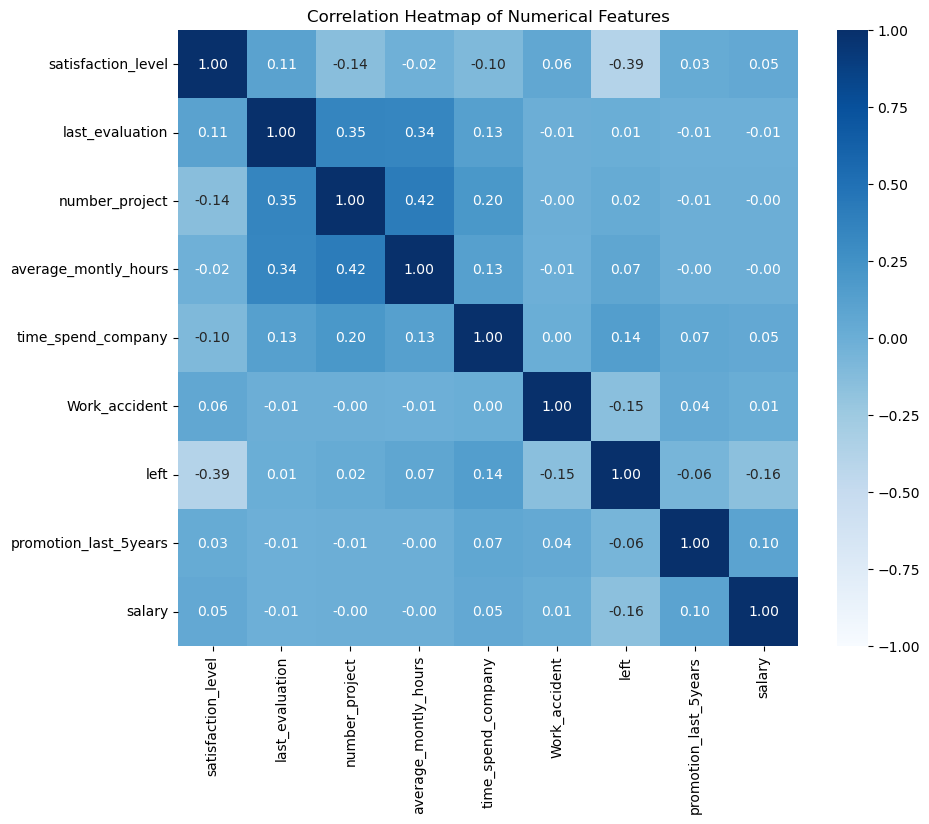

In [26]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', vmin=-1,vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('Correlation_Heatmap.png')
plt.show()

# Key Observations

satisfaction_level (-0.388375):
Strong negative correlation with left.
Employees with lower satisfaction levels are more likely to leave. Dissatisfaction is a primary factor in turnover.

Work_accident (-0.154622):
Negative correlation with left.
Employees who had work accidents are slightly less likely to leave. This could suggest better workplace support post-accidents or other retention mechanisms.

salary (-0.106183):
Negative correlation with left.
Employees with higher salaries are less likely to leave, indicating that compensation plays a role in retention.

promotion_last_5years (-0.061788):
Slight negative correlation with left.
Employees who were promoted in the last 5 years are marginally less likely to leave. Limited impact, but promotions may still help retain employees.

time_spend_company (0.144822):
Positive correlation with left.
Employees with longer tenures are slightly more likely to leave. This may indicate burnout or a plateau in career growth over time.

average_montly_hours (0.071287):
Weak positive correlation with left.
Employees working more hours are marginally more likely to leave. Overwork may contribute to turnover but is not a strong factor.

number_project (0.023787):
Weak positive correlation with left.
The number of projects an employee handles has minimal impact on turnover, suggesting it’s not a decisive factor.

last_evaluation (0.006567):
Near-zero correlation with left.
Employee evaluation scores do not appear to influence retention significantly.